<a href="https://colab.research.google.com/github/alra-code/Alura-changelle-Telecon-X-Parte2/blob/main/Alura_changelle_telecon_X_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/TelecomX_Dados_Tratados.csv')
df.head(20)

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_na_Empresa,Telefone_Fixo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,internet.StreamingTV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobrança_diaria,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),2.12,69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),3.71,109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),2.85,84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,1.62,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,3.06,90.45,5957.90


In [2]:
df.columns

Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Meses_na_Empresa', 'Telefone_Fixo',
       'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'internet.StreamingTV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Digital', 'Metodo_Pagamento', 'Cobrança_diaria',
       'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Cancelou              7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Tem_Parceiro          7043 non-null   object 
 5   Tem_Dependentes       7043 non-null   object 
 6   Meses_na_Empresa      7043 non-null   int64  
 7   Telefone_Fixo         7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Tipo_Internet         7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  internet.StreamingTV  7043 non-null   object 
 15  Streaming_Filmes     

#Preparação dos Dados

In [7]:
#removendo colunas desnecessárias
df = df.drop(columns=['ID_Cliente'])

In [9]:
#Reduzindo multicolinearidade e simplificando os dados
# para criar um novo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'internet.StreamingTV', 'Streaming_Filmes'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sem dummy trap)
categorical_cols = [
       'Cancelou', 'Genero', 'Tem_Parceiro', 'Tem_Dependentes',
       'Telefone_Fixo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico',
       'internet.StreamingTV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Digital', 'Metodo_Pagamento'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Pronto para usar!
df_encoded

,Idoso,Meses_na_Empresa,Cobrança_diaria,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,...,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,internet.StreamingTV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Idoso                                     7043 non-null   int64  
 1   Meses_na_Empresa                          7043 non-null   int64  
 2   Cobrança_diaria                           7032 non-null   float64
 3   Cobranca_Mensal                           7043 non-null   float64
 4   Cobranca_Total                            7032 non-null   float64
 5   Cancelou_Yes                              7043 non-null   bool   
 6   Genero_Male                               7043 non-null   bool   
 7   Tem_Parceiro_Yes                          7043 non-null   bool   
 8   Tem_Dependentes_Yes                       7043 non-null   bool   
 9   Telefone_Fixo_Yes                         7043 non-null   bool   
 10  Multiplas_Linhas_No phone service   

In [11]:
#verificando os valores nulos
df_encoded.isnull().sum()

,0
Idoso,0
Meses_na_Empresa,0
Cobrança_diaria,11
Cobranca_Mensal,0
Cobranca_Total,11
Cancelou_Yes,0
Genero_Male,0
Tem_Parceiro_Yes,0
Tem_Dependentes_Yes,0
Telefone_Fixo_Yes,0


In [13]:
# Verifica valores nulos nas duas colunas
print(df_encoded[['Cobrança_diaria', 'Cobranca_Total']].isnull().sum())

Cobrança_diaria    11
Cobranca_Total     11
dtype: int64


In [14]:
# Remove linhas com valores nulos nas colunas especificadas
df_encoded = df_encoded.dropna(subset=['Cobrança_diaria', 'Cobranca_Total'])

In [15]:
df_encoded.isnull().sum()

,0
Idoso,0
Meses_na_Empresa,0
Cobrança_diaria,0
Cobranca_Mensal,0
Cobranca_Total,0
Cancelou_Yes,0
Genero_Male,0
Tem_Parceiro_Yes,0
Tem_Dependentes_Yes,0
Telefone_Fixo_Yes,0


# Normalização / Padronização

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Selecionando apenas colunas numéricas (exceto a variável target, se já estiver separada)
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Exibindo os dados normalizados
df_encoded.head()

/tmp/ipython-input-1813312292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])


,Idoso,Meses_na_Empresa,Cobrança_diaria,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,...,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,internet.StreamingTV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# Correlação entre as variáveis

In [19]:
corr = df_encoded.corr()

In [20]:
corr

,Idoso,Meses_na_Empresa,Cobrança_diaria,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,...,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,internet.StreamingTV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
Idoso,1.000000,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
Meses_na_Empresa,0.015683,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
Cobrança_diaria,0.217622,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.097159,-0.112514,0.247900,...,0.481736,0.338021,0.626474,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
Cobranca_Mensal,0.219874,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
Cobranca_Total,0.102411,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Cancelou_Yes,0.150541,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
Genero_Male,-0.001819,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Tem_Parceiro_Yes,0.016957,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Tem_Dependentes_Yes,-0.210550,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
Telefone_Fixo_Yes,0.008392,0.007877,0.247900,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,...,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


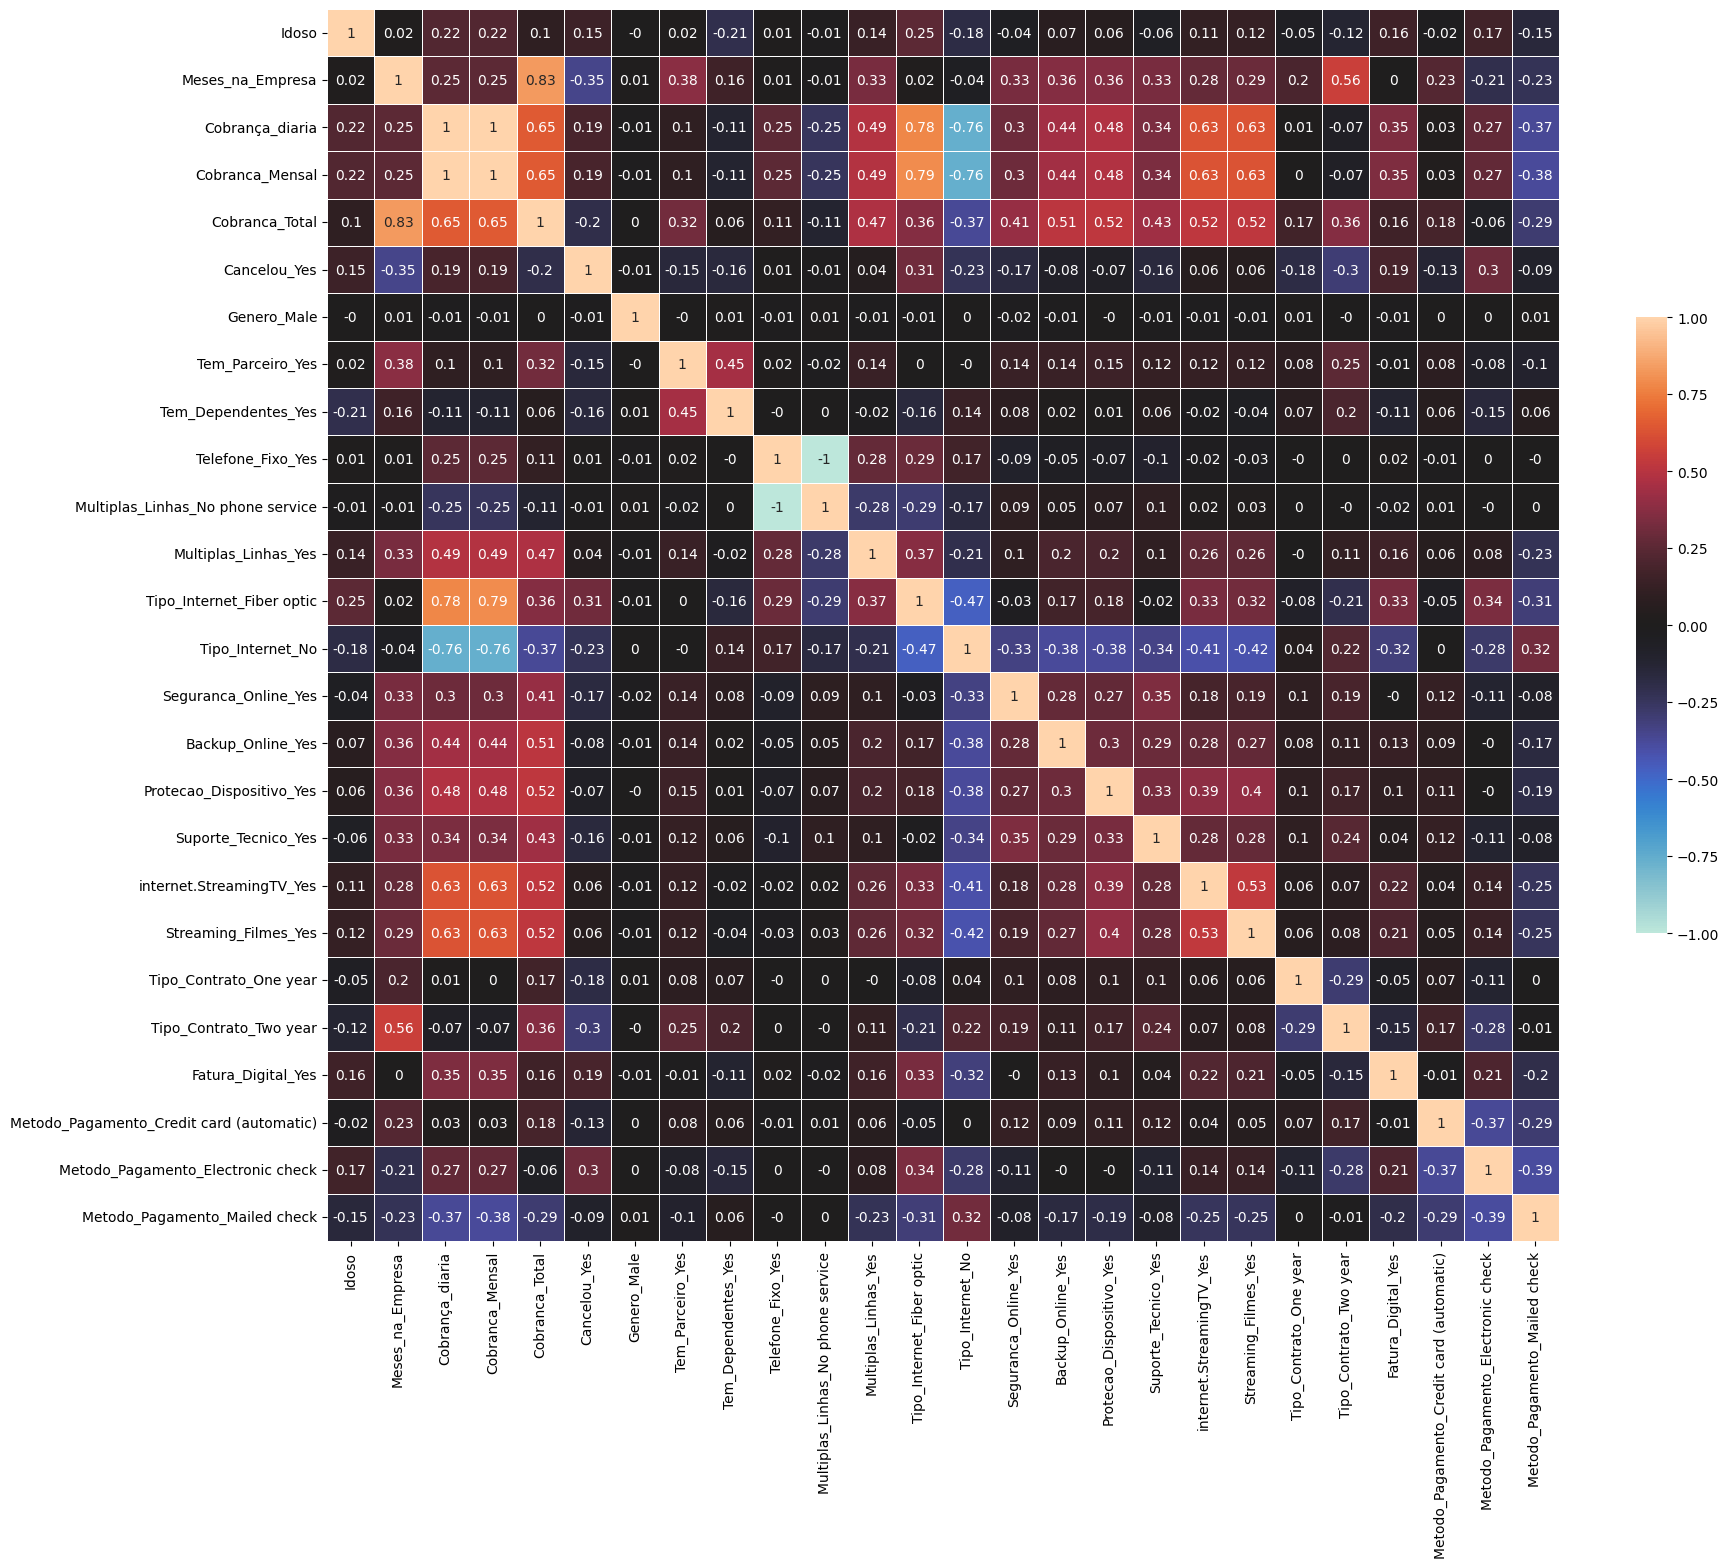

In [21]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

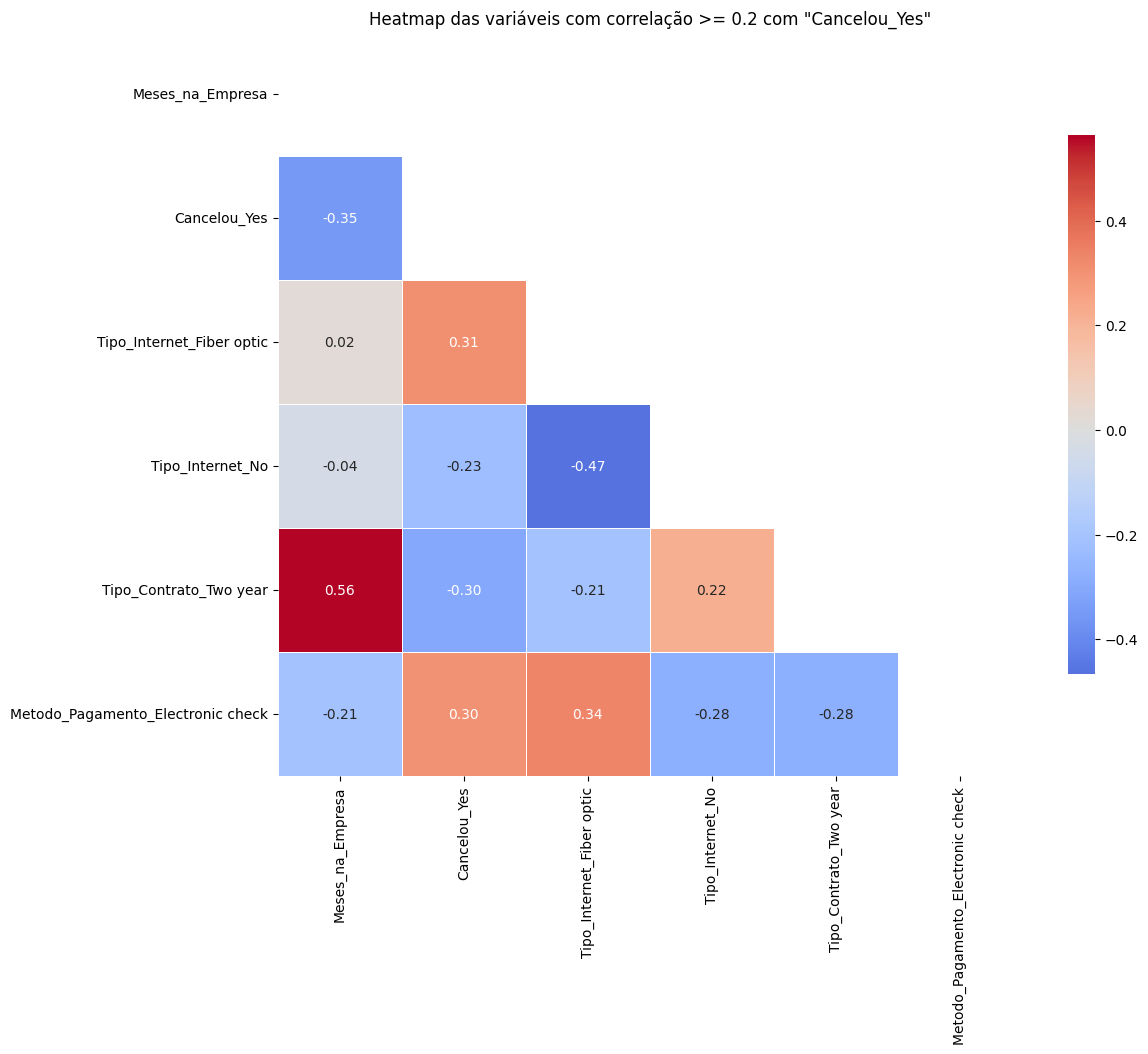

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Definir a variável alvo
target_var = 'Cancelou_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [26]:
X = df_encoded.drop(columns=['Cancelou_Yes'])

In [27]:
X_const = add_constant(X)

In [28]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,Telefone_Fixo_Yes,inf
10,Multiplas_Linhas_No phone service,inf
4,Cobranca_Mensal,893.801679
12,Tipo_Internet_Fiber optic,148.489528
3,Cobrança_diaria,133.569255
13,Tipo_Internet_No,104.213964
19,Streaming_Filmes_Yes,24.155141
18,internet.StreamingTV_Yes,24.033815
5,Cobranca_Total,10.871303
2,Meses_na_Empresa,7.613409


In [30]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

cols_to_drop = [
    "Telefone_Fixo_Yes",
    "Multiplas_Linhas_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# X_filtered.drop(columns=["Total.Day"], inplace=True) # This column does not exist

X_filtered.drop(columns=["Tipo_Internet_No"], inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
4,Cobranca_Mensal,148.896142
3,Cobrança_diaria,133.778765
0,const,22.168406
5,Cobranca_Total,10.767639
2,Meses_na_Empresa,7.578251
10,Tipo_Internet_Fiber optic,6.998087
18,Tipo_Contrato_Two year,2.532292
15,internet.StreamingTV_Yes,2.189591
16,Streaming_Filmes_Yes,2.188134
21,Metodo_Pagamento_Electronic check,1.967660


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [47]:
X = df_encoded.drop(columns=['Cancelou_Yes'])
y = df_encoded['Cancelou_Yes']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [51]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453651312041925
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [52]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241531250683265
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

